In [ ]:
# !pip install -q ChernoffFace

In [ ]:
from ChernoffFace import *
import numpy
import numpy as np
import pandas as pd
import matplotlib.cm
import matplotlib.pyplot as plt

CPS1985

Данные поперечного сечения, взятые из текущего обследования населения, проведенного Бюро переписи населения США в мае 1985 г. (случайная выборка, составленная для Берндта, 1991 г.).

Фрейм данных, содержащий 534 наблюдения по 11 переменным.

wage - доллар/час

education - год

experience - год работы

age - год

ethnicity - Фактор с уровнями «cauc», «hispanic», «other».

region - Фактор. Человек живет на юге?

gender - male.female

occupation - Фактор с уровнями «worker» (торговец или рабочий на конвейере), «technical» (технический или профессиональный рабочий), «services» (работник сферы услуг), «office» (офисно-канцелярский работник), «sales» (торговый работник), «management» (управление и администрирование).

sector - Фактор с уровнями «manufacturing» (производство или добыча), «construction», «other».

union - Фактор. Работает ли человек на профсоюзной работе?

married - Фактор. Женат ли человек?

In [ ]:
df = pd.read_csv('CPS1985.csv', index_col=0)
df

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
1,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1100,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
529,11.36,18,5,29,cauc,other,male,technical,other,no,no
530,6.10,12,33,51,other,other,female,technical,other,no,yes
531,23.25,17,25,48,other,other,female,technical,other,yes,yes
532,19.88,12,13,31,cauc,south,male,technical,other,yes,yes


In [ ]:
# change the value "yes" and "no" to numeric values, eg: 1 or 0

df['married'] = (df['married']=="yes")*1
df['union'] = (df['union']=="yes")*1

In [ ]:
df2 = pd.read_csv('HousePrices.csv', index_col=0)
df2

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [ ]:
# to change some values to numeric values

df2['driveway'] = (df2['driveway']=="yes")*1
df2['recreation'] = (df2['recreation']=="yes")*1
df2['fullbase'] = (df2['fullbase']=="yes")*1
df2['gasheat'] = (df2['gasheat']=="yes")*1
df2['aircon'] = (df2['aircon']=="yes")*1
df2['prefer'] = (df2['prefer']=="yes")*1

# Лица Чернова

1. `df_scaled = variables_rescale(df)`: Эта строка, вероятно, вызывает функцию с именем `variables_rescale` и передает DataFrame `df` в качестве аргумента. Это подразумевает, что `variables_rescale` - это пользовательская функция, определенная в другом месте кода. Исходя из ее названия, она, вероятно, выполняет некоторый вид масштабирования или нормализации переменных в DataFrame. Результат вызова этой функции присваивается новому DataFrame `df_scaled`.

In [ ]:
df_scaled = variables_rescale(df)

`df_scaled = df_scaled.drop(0, axis=0)`: Эта строка удаляет строку из DataFrame `df_scaled`. Вот что делает каждая часть:
   - `df_scaled.drop(0, axis=0)`: Эта часть кода вызывает метод `drop` на DataFrame `df_scaled`. Аргумент `0` указывает метку индекса строки, которую нужно удалить, а `axis=0` указывает, что операция должна выполняться вдоль оси строк (т. е. удаление строки).
   - `df_scaled = ...`: Наконец, результат операции `drop` присваивается обратно переменной `df_scaled`, эффективно обновляя ее с удаленной строкой.

In [ ]:
df_scaled = df_scaled.drop(0, axis=0)

In [ ]:
df_scaled.iloc[0:40]

,ethnicity,region,gender,occupation,sector,wage,education,experience,age,union,married
1,cauc,other,female,worker,manufacturing,0.094253,0.3750,0.381818,0.369565,0.0,1.0
2,cauc,other,male,worker,manufacturing,0.130345,0.6250,0.018182,0.021739,0.0,0.0
3,cauc,other,male,worker,other,0.068966,0.6250,0.072727,0.086957,0.0,0.0
4,cauc,other,male,worker,other,0.149425,0.6250,0.309091,0.369565,0.0,1.0
5,cauc,other,male,worker,other,0.277471,0.6875,0.163636,0.217391,1.0,0.0
6,cauc,south,male,worker,other,0.079310,0.5000,0.490909,0.543478,0.0,0.0
7,cauc,other,male,worker,other,0.424598,0.6250,0.163636,0.195652,0.0,0.0
8,cauc,other,male,worker,manufacturing,0.282299,0.8750,0.200000,0.326087,0.0,1.0
9,cauc,other,male,worker,other,0.178161,0.6250,0.163636,0.195652,0.0,0.0
10,cauc,other,male,worker,other,0.237931,0.6250,0.309091,0.369565,1.0,1.0


In [ ]:
df2_scaled = variables_rescale(df2)

In [ ]:
df2_scaled = df2_scaled.drop(0,axis=0)

C:\Users\RAFLY AULYA RIZKY N\AppData\Local\Temp\ipykernel_13060\1437637638.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  titles=[str(x) + '. Age: ' + str(int(list(df['age'][0:100]/10)[x])) + '' for x in range(len(list(df['age'][0:100]/10)))],


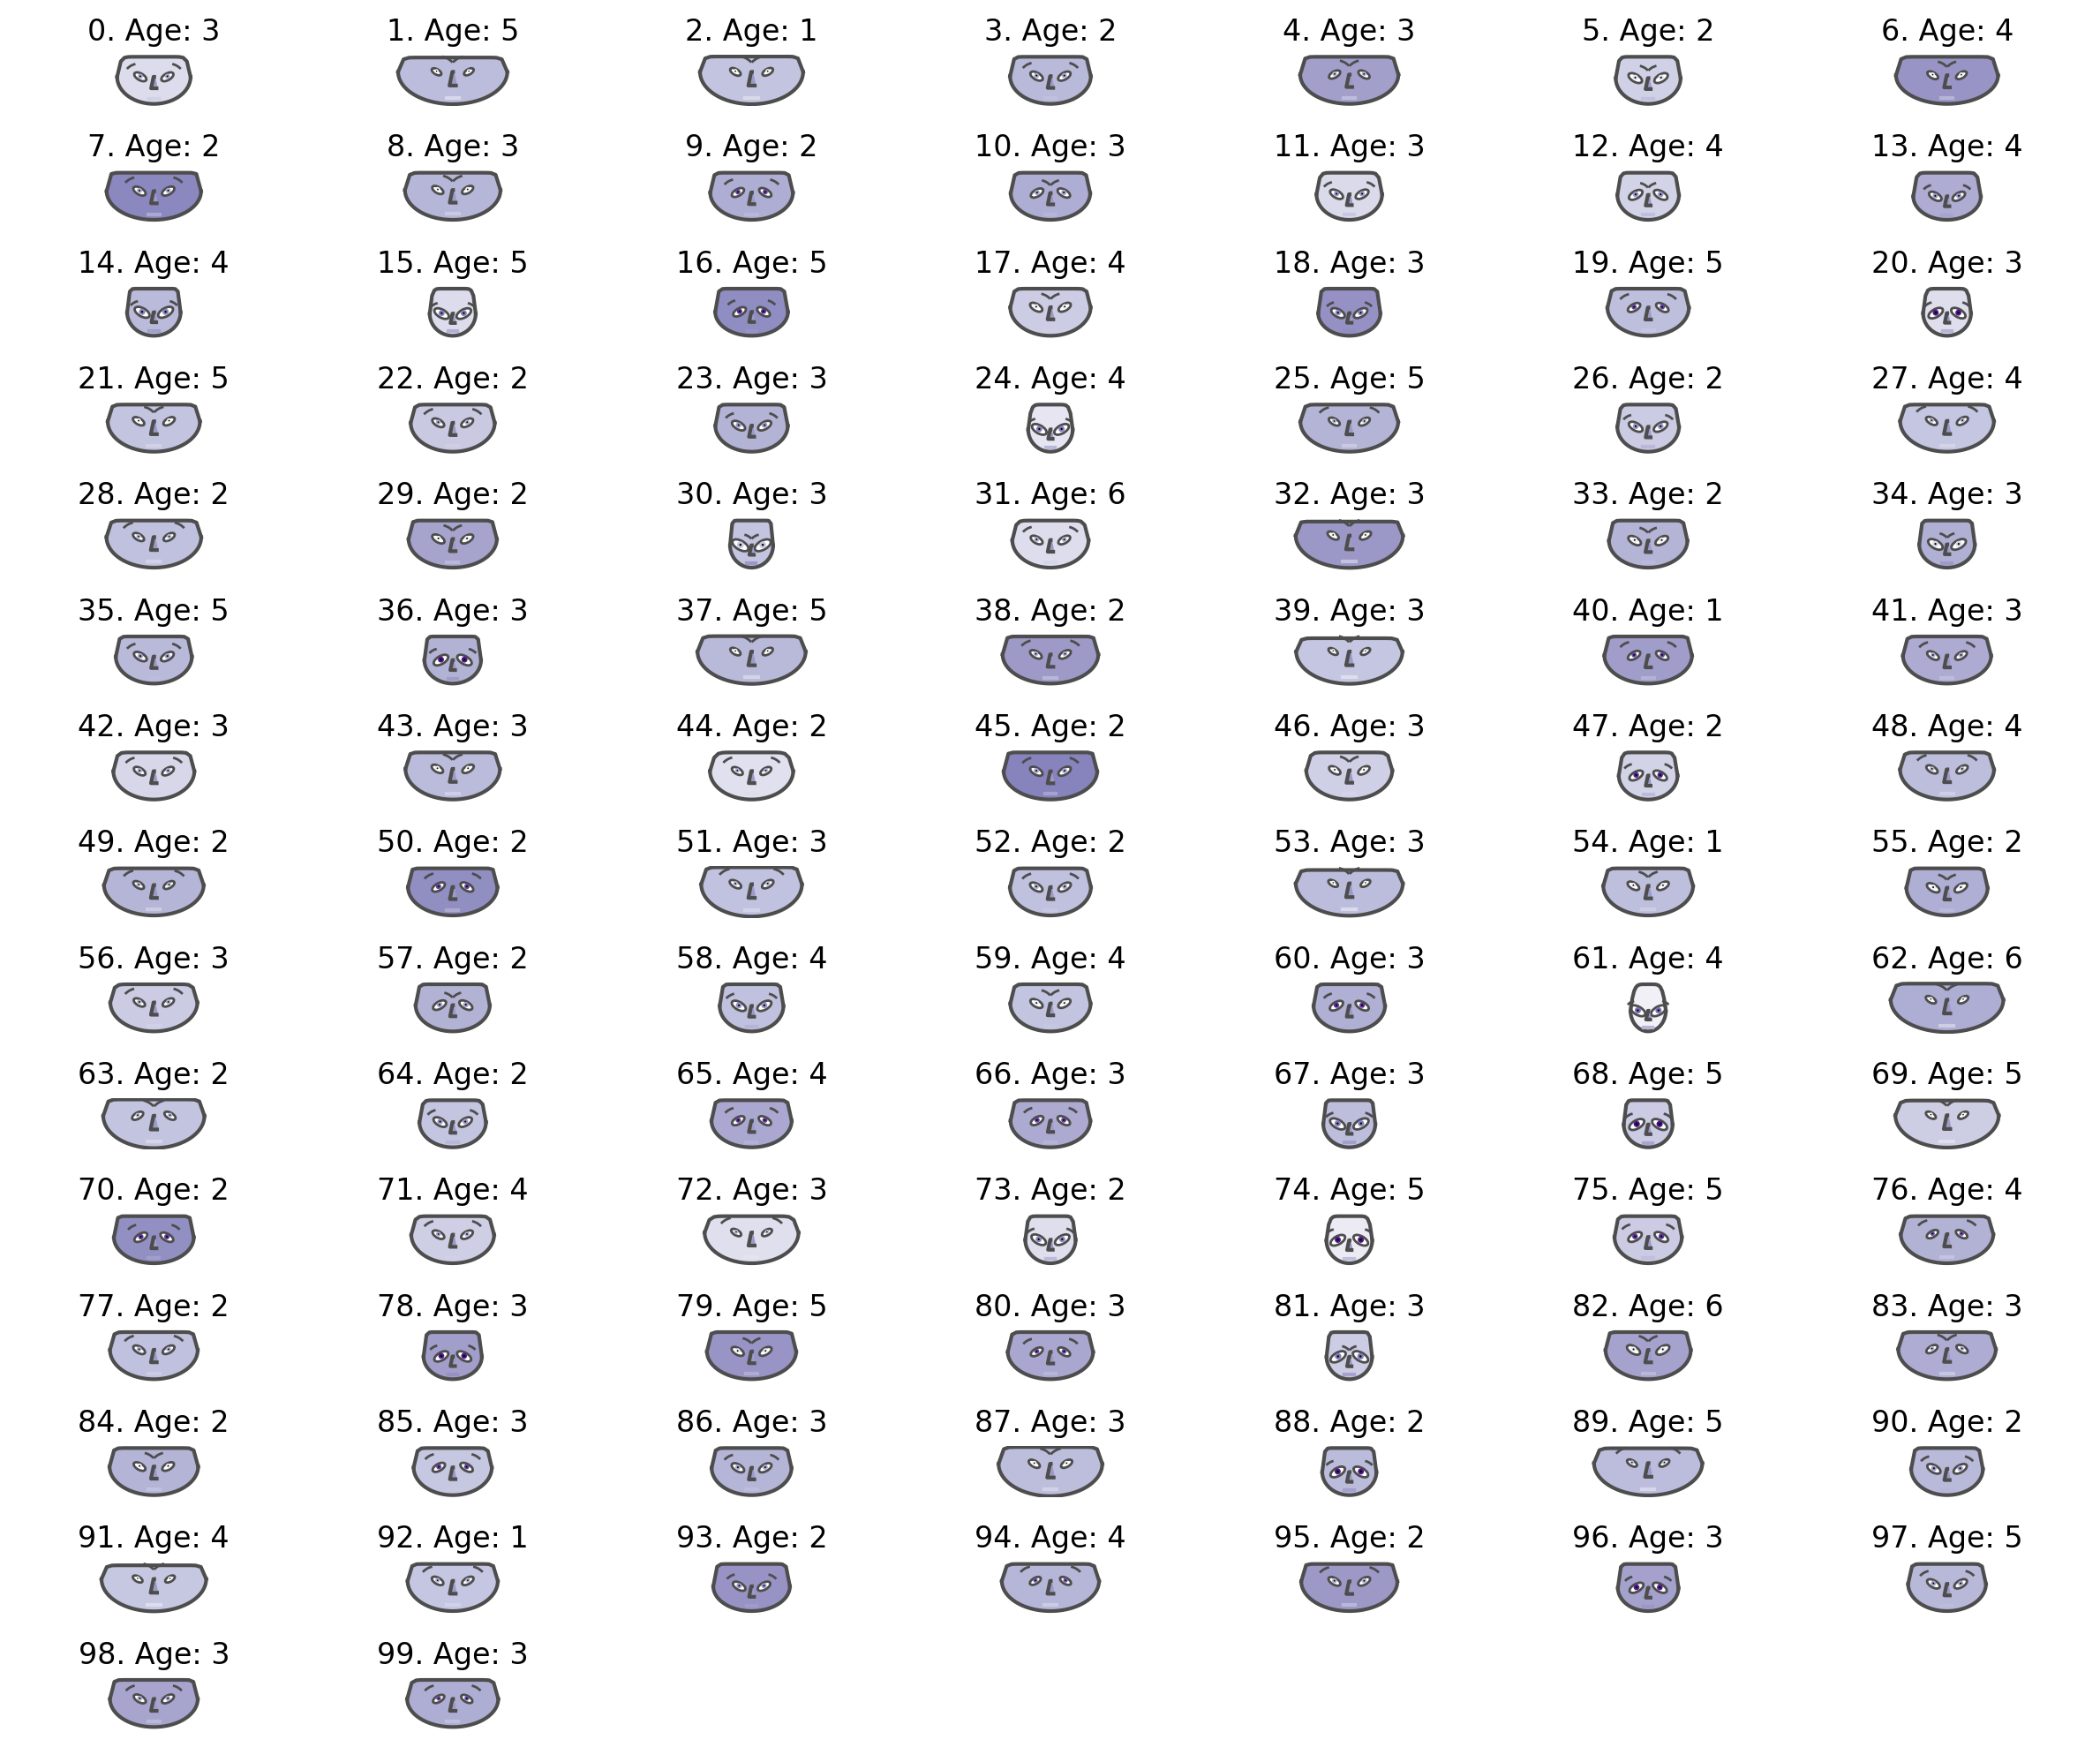

In [ ]:
fig = chernoff_face(data=df_scaled[0:100],
                    n_columns=7,
                    long_face=False,
                    color_mapper=matplotlib.cm.Purples,
                    titles=[str(x) + '. Age: ' + str(int(list(df['age'][0:100]/10)[x])) + '' for x in range(len(list(df['age'][0:100]/10)))],
                    figsize=(12, 10),
                    dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

## Постройте Лица Чернова для полученных групп и вновь интерпретируйте результат. 

In [ ]:
df_group = df_scaled.groupby(by=['age'],as_index=False).mean()

C:\Users\RAFLY AULYA RIZKY N\AppData\Local\Temp\ipykernel_13060\471259045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df_scaled.groupby(by=['age'],as_index=False).mean()


In [ ]:
df_scaled['age'].unique()

array([0.36956522, 0.02173913, 0.08695652, 0.2173913 , 0.54347826,
       0.19565217, 0.32608696, 0.41304348, 0.5       , 0.58695652,
       0.56521739, 0.80434783, 0.84782609, 0.7173913 , 0.34782609,
       0.2826087 , 0.17391304, 0.60869565, 1.        , 0.13043478,
       0.7826087 , 0.43478261, 0.76086957, 0.06521739, 0.26086957,
       0.        , 0.30434783, 0.23913043, 0.63043478, 0.15217391,
       0.39130435, 0.47826087, 0.52173913, 0.82608696, 0.04347826,
       0.91304348, 0.86956522, 0.10869565, 0.89130435, 0.65217391,
       0.69565217, 0.73913043, 0.93478261, 0.97826087, 0.67391304,
       0.95652174, 0.45652174])

In [ ]:
df_group

,age,wage,education,experience,union,married
0,0.000000,0.101724,0.687500,0.000000,0.000000,0.000000
1,0.021739,0.089287,0.643750,0.012727,0.100000,0.000000
2,0.043478,0.090739,0.656250,0.027273,0.071429,0.285714
3,0.065217,0.185211,0.651042,0.046970,0.000000,0.500000
4,0.086957,0.101768,0.653846,0.064336,0.153846,0.307692
5,0.108696,0.129885,0.632812,0.088636,0.125000,0.750000
6,0.130435,0.132502,0.663462,0.097902,0.153846,0.076923
7,0.152174,0.107870,0.713235,0.101604,0.117647,0.529412
8,0.173913,0.156917,0.735795,0.113223,0.090909,0.500000
9,0.195652,0.185544,0.680147,0.147594,0.235294,0.529412


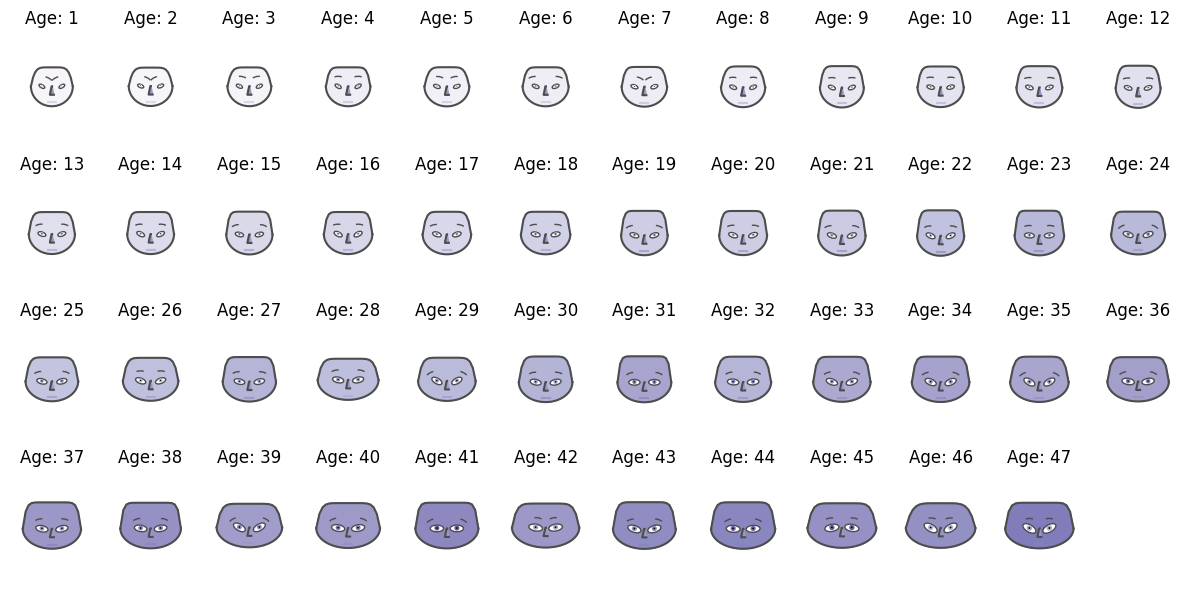

In [ ]:
fig = chernoff_face(data=df_group,
                    n_columns=12,
                    long_face=False,
                    color_mapper=matplotlib.cm.Purples,
                    titles=['Age: ' + str(x) for x in list(range(1, len(df_group)+1))],
                    figsize=(12, 6), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

# График параллельных координат

In [ ]:
import plotly.express as px

In [ ]:
df_scaled

,ethnicity,region,gender,occupation,sector,wage,education,experience,age,union,married
1,cauc,other,female,worker,manufacturing,0.094253,0.3750,0.381818,0.369565,0.0,1.0
2,cauc,other,male,worker,manufacturing,0.130345,0.6250,0.018182,0.021739,0.0,0.0
3,cauc,other,male,worker,other,0.068966,0.6250,0.072727,0.086957,0.0,0.0
4,cauc,other,male,worker,other,0.149425,0.6250,0.309091,0.369565,0.0,1.0
5,cauc,other,male,worker,other,0.277471,0.6875,0.163636,0.217391,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
530,other,other,female,technical,other,0.117241,0.6250,0.600000,0.717391,0.0,1.0
531,other,other,female,technical,other,0.511494,0.9375,0.454545,0.652174,1.0,1.0
532,cauc,south,male,technical,other,0.434023,0.6250,0.236364,0.282609,1.0,1.0
533,cauc,other,male,technical,manufacturing,0.330575,0.8750,0.600000,0.804348,0.0,1.0


In [ ]:
df.columns

Index(['wage', 'education', 'experience', 'age', 'ethnicity', 'region',
       'gender', 'occupation', 'sector', 'union', 'married'],
      dtype='object')

In [ ]:
fig = px.parallel_coordinates(df_scaled, color="wage",
       dimensions=['wage', 'education', 'experience', 'age', 'ethnicity', 'region',
       'gender', 'occupation', 'sector', 'union', 'married'],
       labels={'wage':'заработная плата', 'education':'образ', 'experience':'опыт', 'age':'возраст', 'ethnicity':'ethnicity', 'region':'регион',
               'gender':'рост', 'occupation':'occupation', 'sector':'sector', 'union':'union', 'married':'married'})
fig.show()


этот код создает параллельный координатный график для визуализации взаимосвязей между различными атрибутами (например, заработной платой, образованием, опытом работы и т. д.) в наборе данных. Цвет каждой линии на графике соответствует значению столбца "wage", и график помогает понять, как различные атрибуты взаимосвязаны между собой на протяжении различных точек данных.

In [ ]:
fig = px.parallel_coordinates(df_scaled, color="wage",
                              dimensions=['education', 'age', 'married'],
                              labels={'education':'education', 'age':'age','married':'married' })
fig.show()

In [ ]:
df_scaled1 = df_scaled.sort_values(by='age', axis=0, ascending=True)

In [ ]:
df_scaled2 = df2_scaled.sort_values(by ='bedrooms',axis =0,ascending = True)

# График RadViz

In [ ]:
df_scaled1

,ethnicity,region,gender,occupation,sector,wage,education,experience,age,union,married
398,cauc,other,female,services,other,0.054023,0.6250,0.000000,0.000000,0.0,0.0
443,cauc,other,female,technical,other,0.206897,0.8750,0.000000,0.000000,0.0,0.0
298,cauc,other,female,office,other,0.091954,0.6250,0.000000,0.000000,0.0,0.0
40,cauc,other,male,worker,other,0.054023,0.6250,0.000000,0.000000,0.0,0.0
130,hispanic,south,male,worker,other,0.114943,0.6250,0.018182,0.021739,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31,cauc,south,female,worker,other,0.068966,0.6250,0.836364,1.000000,0.0,0.0
62,hispanic,south,male,worker,manufacturing,0.137931,0.0625,1.000000,1.000000,0.0,1.0
331,cauc,other,female,office,manufacturing,0.246207,0.8750,0.763636,1.000000,0.0,0.0
346,cauc,other,male,services,other,0.114943,0.1250,0.981818,1.000000,0.0,1.0


In [ ]:
df_scaled2

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
19,0.121212,0.123711,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
234,0.045455,0.159450,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
106,0.109091,0.202749,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
107,0.139394,0.142268,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0
246,0.073939,0.086598,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.551515,0.356701,0.8,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
51,0.181818,0.250859,0.8,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
159,0.224242,0.017526,0.8,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
355,0.375152,0.182131,1.0,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
df2_group = df_scaled2.groupby(by=['bedrooms'],as_index=False).mean()
df2_group

,bedrooms,price,lotsize,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,0.0,0.083333,0.141581,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.2,0.162946,0.205240,0.019608,0.056373,0.852941,0.117647,0.250000,0.036765,0.161765,0.164216,0.117647
2,0.4,0.277680,0.245764,0.088594,0.312292,0.870432,0.192691,0.388704,0.046512,0.358804,0.240310,0.292359
3,0.6,0.344568,0.270245,0.207018,0.435088,0.863158,0.221053,0.357895,0.042105,0.421053,0.305263,0.242105
4,0.8,0.352364,0.319003,0.266667,0.333333,0.600000,0.200000,0.600000,0.200000,0.300000,0.200000,0.100000
5,1.0,0.263333,0.158076,0.166667,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000


In [ ]:
df_scaled2.columns = ["price",'lotsize','bedrooms','bathrooms','stories','driveway','recreation','fullbase','gasheat','aircon','garage','prefer']
df2_group.columns = ['bedrooms'	,'price',	'lotsize',	'bathrooms'	,'stories',	'driveway',	'recreation',	'fullbase',	'gasheat'	,'aircon',	'garage',	'prefer']

In [ ]:
df_scaled1.columns = ['ethnicity', 'region', 'gender', 'occupation', 'sector', 'union', 'married', 'wage', 'education', 'experience', 'age']
df_group.columns = ['age'	,'wage',	'education'	,'experience',	'union'	,'married']

<AxesSubplot: >

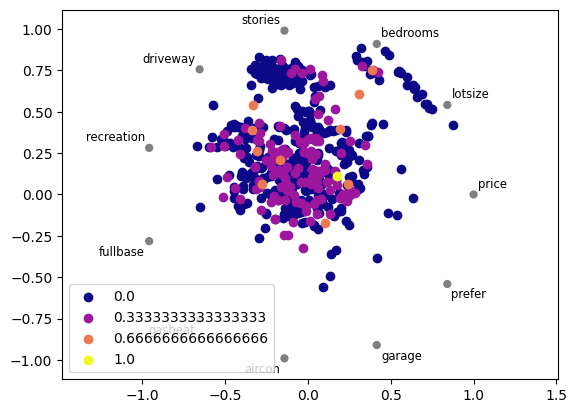

In [ ]:
pd.plotting.radviz(df_scaled2, 'bathrooms', colormap=matplotlib.cm.plasma)

этот код создает график RadViz для визуализации взаимосвязей между различными атрибутами в наборе данных. Каждая точка данных представлена как точка на окружности, и цвет каждой точки определяется значением столбца 'bathrooms'. График помогает понять, как различные атрибуты взаимосвязаны между собой на протяжении различных точек данных.

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:179: RuntimeWarning:

invalid value encountered in divide



<AxesSubplot: >

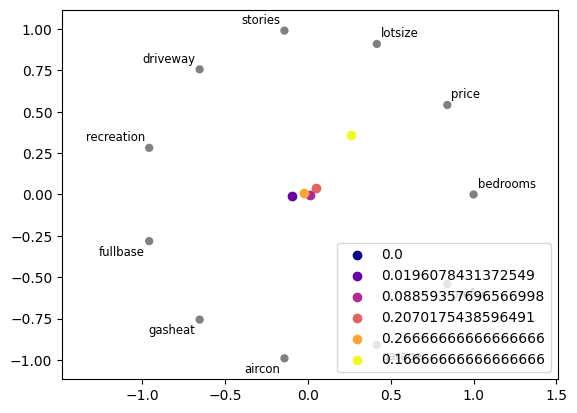

In [ ]:
pd.plotting.radviz(df2_group, 'bathrooms', colormap=matplotlib.cm.plasma)

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:179: RuntimeWarning:

invalid value encountered in divide



<AxesSubplot: >

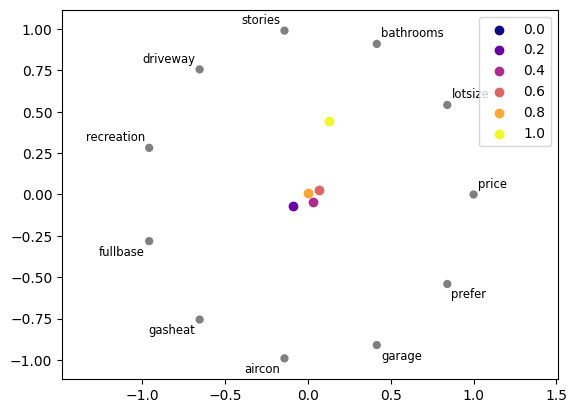

In [ ]:
pd.plotting.radviz(df2_group, 'bedrooms', colormap=matplotlib.cm.plasma)

<AxesSubplot: >

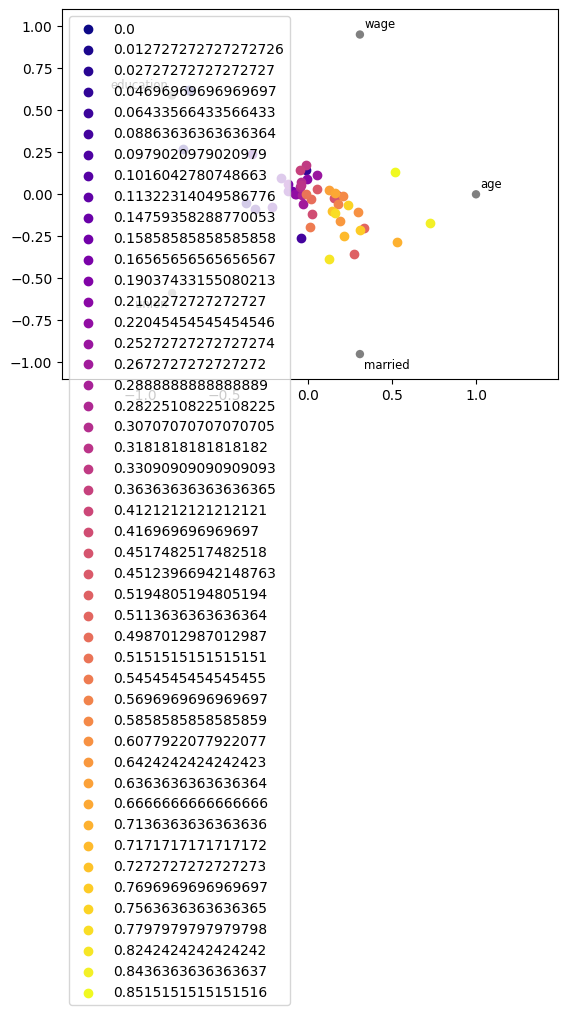

In [ ]:
pd.plotting.radviz(df_group, 'experience', colormap=matplotlib.cm.plasma)

# Кривые Эндрюса

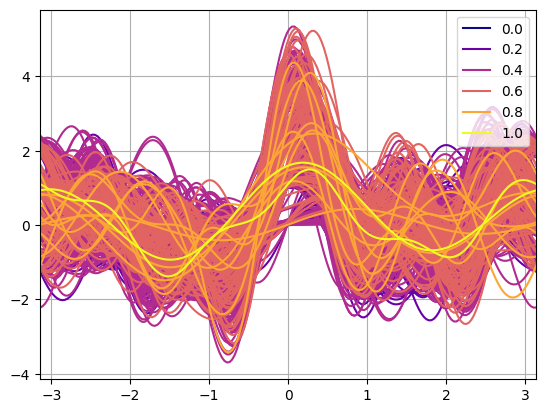

In [ ]:
x = pd.plotting.andrews_curves(df_scaled2, 'bedrooms', colormap=matplotlib.cm.plasma)

Andrews curves are a method of visualizing high-dimensional data by mapping each observation to a curve in a two-dimensional space. Each curve is generated by taking a weighted sum of the variables for a given observation, where the weights are given by a set of orthogonal functions (such as the Fourier series). By plotting these curves and coloring them based on a categorical variable, it is possible to see how the different categories are distributed in the high-dimensional space.

In this case, the code is generating Andrews curves for the data in df_scaled2, using the 'bedrooms' column to group the data. This means that each curve in the plot will correspond to a single observation, and the color of the curve will indicate the number of bedrooms in the corresponding observation. This can be useful for visualizing the distribution of the data and identifying any patterns or clusters that may exist.

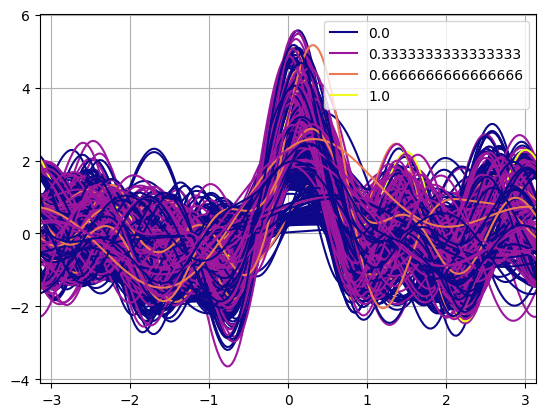

In [ ]:
x = pd.plotting.andrews_curves(df_scaled2, 'bathrooms', colormap=matplotlib.cm.plasma)

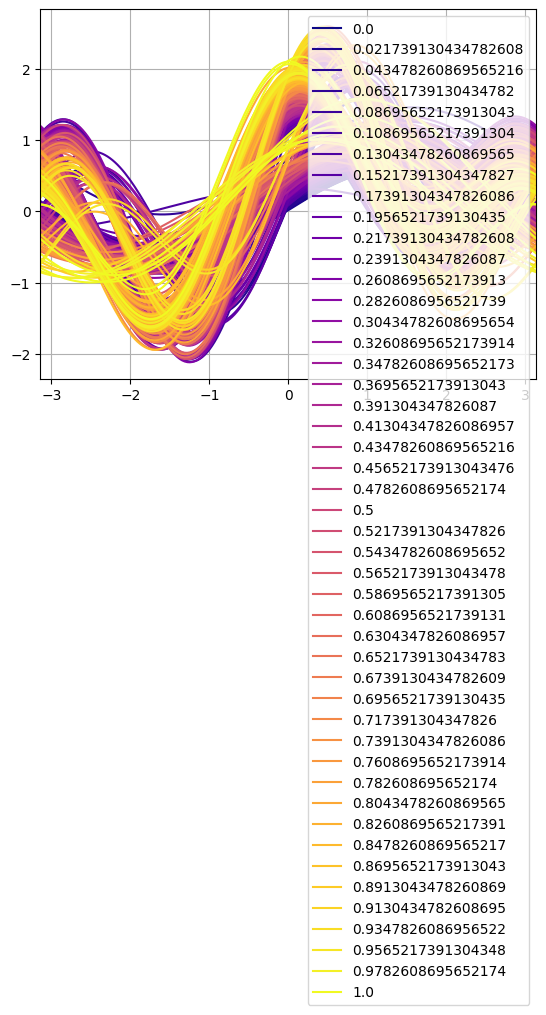

In [ ]:
numeric_cols = df_scaled1.select_dtypes(include=[np.number]).columns
x = pd.plotting.andrews_curves(df_scaled1[numeric_cols], 'education', colormap=matplotlib.cm.plasma)

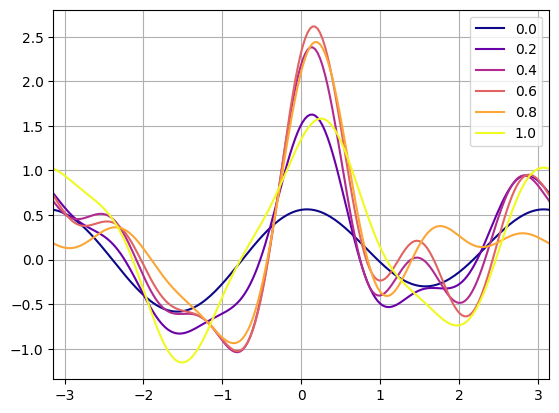

In [ ]:
x = pd.plotting.andrews_curves(df2_group, 'bedrooms', colormap=matplotlib.cm.plasma)

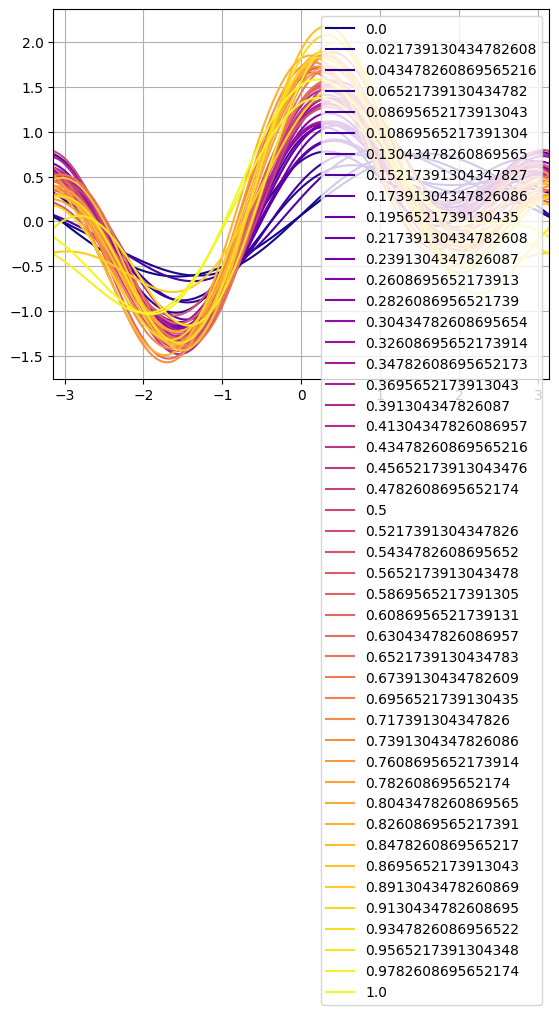

In [ ]:
x = pd.plotting.andrews_curves(df_group, 'age', colormap=matplotlib.cm.plasma)